In [1]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

y_train = np.array([label % 2 for label in y_train])
y_test = np.array([label % 2 for label in y_test])

# entropy gradient function
def entropy_gradient(weights):
    return -weights * np.log(np.abs(weights) + 1e-8)

# improved neural network model with entropy gradient and constraints
def build_advanced_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_advanced_model()
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# entropy gradient update
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        new_weights = entropy_gradient(layer.get_weights()[0])
        model.get_layer(layer.name).set_weights([new_weights, layer.get_weights()[1]])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8976 - loss: 0.2418 - val_accuracy: 0.9748 - val_loss: 0.0690
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9728 - loss: 0.0793 - val_accuracy: 0.9828 - val_loss: 0.0509
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0638 - val_accuracy: 0.9814 - val_loss: 0.0506
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9833 - loss: 0.0500 - val_accuracy: 0.9864 - val_loss: 0.0430
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0480 - val_accuracy: 0.9869 - val_loss: 0.0384
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0440 - val_accuracy: 0.9877 - val_loss: 0.0373
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9856 - loss: 0.0410 - val_accuracy: 0.9870 - val_loss: 0.0390
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9876 - loss: 0.0367 - val_accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


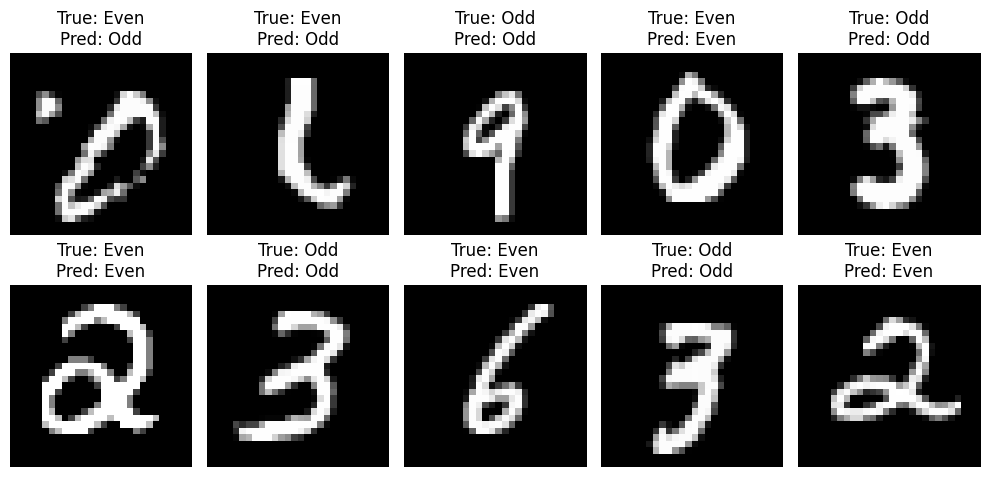

In [2]:
import matplotlib.pyplot as plt
import numpy as np

random_indices = np.random.choice(len(x_test), 10, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    image = x_test[idx].reshape(28, 28)
    true_label = "Odd" if y_test[idx] == 1 else "Even"
    pred_label = "Odd" if model.predict(x_test[idx:idx+1]) >= 0.5 else "Even"

    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

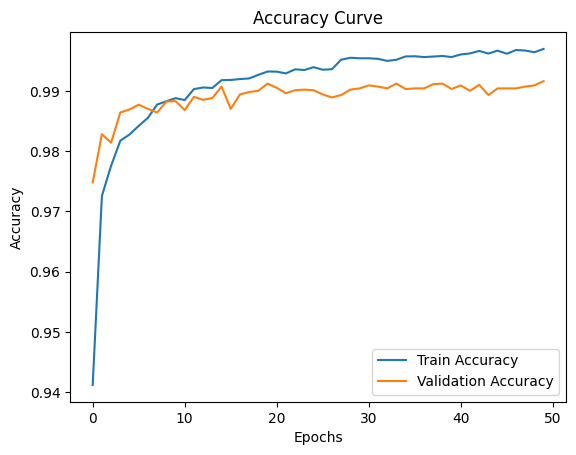

In [3]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()